<a href="https://colab.research.google.com/github/salmazayaf/Latihan-Kompstat/blob/main/Latihan_3_Kompstat_Salma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 3 Komputasi Statistika

# Random Number Generator

**Import Modules**

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

# Soal 01: Multiplicative Congruential

1. Buatlah sebuah fungsi pembangkit bilangan acak dengan fungsi Greenberger (Multiplicative congruential.) dengan ketentuan modifikasi sebagai berikut:
 * 	Xo = 11, a=7, c=5, m = $2^{32}$
 * 	Input fungsi adalah $N$ (jumlah bilangan yang akan dibangkitkan)
 *	Output fungsi adalah sebuah skalar: rata-rata semua $N$ suku dibarisan yang dibangkitkan. 
 *  Jangan lupa untuk menormalisasi semua sukunya dengan $m$.

2. Jika $X = x_1, x_2, ..., x_N$ adalah barisan $N$ output dari fungsi diatas, apakah distribusi dari $X$? Jelaskan.

3. Apakah $X$ memiliki periode? jelaskan.

In [3]:
# No. 1

def Greenberger_m2(xo = 11, m = 2**(32), a = 7, c = 5, seed = 11, size = 1):
    tot_U = np.zeros(size)
    U = np.zeros(size)
    x = (a*xo+c)%m
    U[0] = x/m
    for i in range(1,size):
        x = (x*xo+1)%m
        U[i] = x/m
        tot_U += U[i]
    tot_U2 = tot_U/size
    new_tot_U = tot_U2[0]
    return new_tot_U

#Contoh Pemakaian
Greenberger_m2(size=20)

0.2661887637339532

In [4]:
# No. 2

# Membuat grafik dari distribusi Multiplicative Congruential untuk melihat 
def Greenberger_m(xo = 11, m = 2**32, a = 7, c = 5, seed = 11, size = 1):
    U = np.zeros(size)
    x = (a*xo+c)%m
    U[0] = x/m
    for i in range(1,size):
        x = (x*xo+1)%m
        U[i] = x/m
    return U

Greenberger_m(size=20)

array([1.90921128e-08, 2.10246071e-07, 2.31293961e-06, 2.54425686e-05,
       2.79868487e-04, 3.07855359e-03, 3.38640898e-02, 3.72504988e-01,
       9.75548630e-02, 7.31034928e-02, 8.04138422e-01, 8.45522637e-01,
       3.00749010e-01, 3.08239110e-01, 3.90630206e-01, 2.96932262e-01,
       2.66254884e-01, 9.28803721e-01, 2.16840934e-01, 3.85250269e-01])

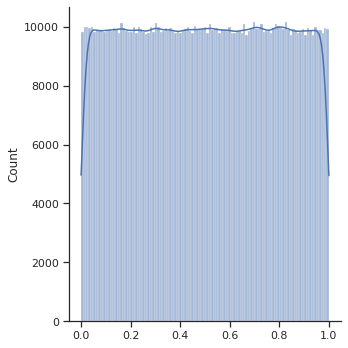

In [5]:
X = Greenberger_m(size=10**6)
plot = sns.displot(x=X, kde=True)

#Distribusi uniform 
# X memiliki periode tetapi terlalu panjang untuk dilihat.

# Soal 02: Poisson Distribution

* Algoritma untuk menghasilkan bilangan random diskrit berdistribusi Poisson dapat anda temukan dari beberapa sumber di dunia maya: https://www.google.com/search?q=algorithm+generate+poisson+distribution&newwindow=1&sxsrf=ALiCzsbKw0SJtuLmaOS3B9XNVrTNtbeuXw:1665702878239&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixjO_iqt76AhXpcGwGHavxB88Q_AUoAXoECAEQAw#imgrc=pnIy3d_qBdlPnM 

1. Aplikasikan algoritma tersebut dengan bahasa Python (tanpa menggunakan module : Pure Python).

2. Bandingkan hasil anda (melalui visualisasi) dengan distribusi Python yang dihasilkan oleh Numpy menggunakan 100.000 sample.
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html


In [6]:
from numpy import random
from random import seed
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def RNPoisson(lam):
  elem = np.exp(-lam)
  n = 0
  pp = elem
  u = np.random.uniform(0,1)
  fact = 1
  pow = 1
  while u > pp:
    n=n+1
    fact, pow=n*fact, lam*pow
    pp=pp+(pow/fact)*elem
  return n

  # Sumber https://www.youtube.com/watch?v=Asto3RS46ks

10it [00:00, 22063.67it/s]


Text(0.5, 1.0, 'Distribusi Poisson tanpa menggunakan module: pure python')

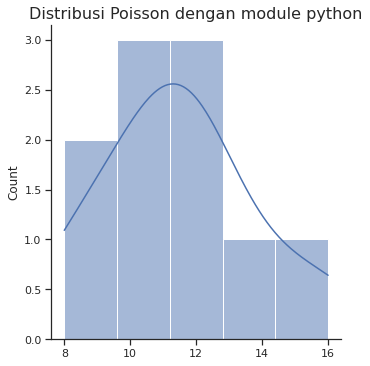

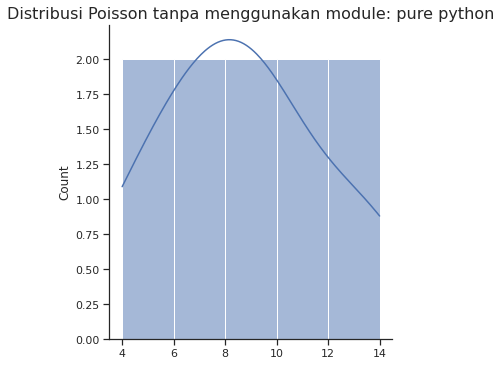

In [8]:
seed(1)
A = random.poisson(lam=10, size=10)
S = 10
L = 10
X = np.zeros(L)

for (i,x) in tqdm(enumerate(X)):
    X[i] = np.sum(RNPoisson(S))

B = X[:L]  #Definisikan hasil fungsi ke dalam variabel baru

plot = sns.displot(x=B, kde=True)
plt.title('Distribusi Poisson dengan module python', size=16)
plot = sns.displot(x=A, kde=True)
plt.title('Distribusi Poisson tanpa menggunakan module: pure python', size=16)

**Kesimpulan**

Pada pengerjaan di atas, digunakan lambda = 10 dan size = 10. 
Terlihat bahwa kedua hasil random distribusi poisson antara yang menggunakan module pure python dan tidak menggunakan module pure python menghasilkan output yang memiliki kemiripan (hampir sama).

# Soal 03: CRUDE MONTE CARLO

* Di Module RNG minggu lalu sudah dibahas tentang Hit-or-Miss Monte Carlo untuk penyelesaian pendekatan dari sebuah integral. Namun Metode Crude Monte Carlo belum dibahas. Keterangan Metode Crude Monte Carlo adalah sebagai berikut:

<img alt="" src="https://github.com/taudataid/KompStat-CaseStudies/blob/main/images/crude-MC.png?raw=1"/>

* Atau anda juga bisa membaca lebih lanjut di tautan berikut: https://www.google.com/search?q=%22Crude+monte+carlo%22+integral&oq=%22Crude+monte+carlo%22+integral&aqs=edge..69i57.8774j0j1&sourceid=chrome&ie=UTF-8

* Menggunakan fungsi yang sama dengan yang ada di module kuliah $$\theta = \int_0^1 \frac{e^x-1}{e-1} dx$$
Tentukan:
1. Solusi Pendekatannya menggunakan Crude MC dengan N = 100
2. Bandingkan hasil pendekatan anda dengan solusi eksak dan solusi hit-or-miss
3. Buatlah selang kepercayaan 95% dari solusi MC ini.

In [9]:
# Pertama, kita Import Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

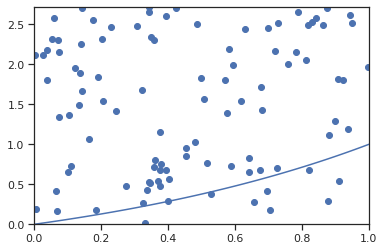

In [10]:
x = np.linspace(0, 1, 100)
def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)
plt.plot(x, f(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0,1])
plt.ylim([0, np.e]);

**Mencari solusi eksak**

In [11]:
# Check analytic solution

from sympy import symbols, integrate, exp

x = symbols('x')
expr = integrate((exp(x)-1)/(exp(1)-1), (x,0,1))
expr.evalf()

0.418023293130674

**Monte Carlo**

In [12]:
# importing the modules
from scipy import random
import numpy as np

# limits of integration
a = 0
b = 1
N = 100

# array of zeros of length N
ar = np.zeros(N)

# iterating over each Value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):
	ar[i] = random.uniform(a,b)

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)

# iterates and sums up values of different functions
# of x
for i in ar:
	integral += f(i)

# we get the answer by the formula derived adobe
ans = (b-a)/float(N)*integral

# prints the solution
print ("Hasil perhitungan dengan integrasi monte carlo adalah {}.".format(ans))

Hasil perhitungan dengan integrasi monte carlo adalah 0.44215982823239786.


In [13]:
# seed the pseudorandom number generator
from numpy.random import seed
from numpy.random import rand

seed(1)
print(rand(3))
seed(7)
print(rand(3))
seed(7)
print(rand(3))

[4.17022005e-01 7.20324493e-01 1.14374817e-04]
[0.07630829 0.77991879 0.43840923]
[0.07630829 0.77991879 0.43840923]


In [14]:
def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)

seed(1)

N=100
teta = 0.418
sigma = 0.286 #Solusi Eksak teta dan sigma didapatkan dari modul
xrand = rand(N)
yrand = rand(N) # Random Uniform x dan y
print('$$$ Hit or Miss Monte Carlo $$$') # Hit or Miss Monte Carlo

fxrand=f(xrand)
CheckValue = fxrand>=yrand
Hit_or_Miss=sum(CheckValue)/N

print('Hasil Approksimasi = ', Hit_or_Miss)
print('Error = ', abs(teta-Hit_or_Miss))
print('Standar Error = ', np.sqrt(teta*(1-teta)/N))
print('Aproksimasi Error = ', np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N))
print('Confidence Interval 95% = ', Hit_or_Miss, ' +/- ', 2*np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N))

$$$ Hit or Miss Monte Carlo $$$
Hasil Approksimasi =  0.43
Error =  0.01200000000000001
Standar Error =  0.049323016939356014
Aproksimasi Error =  0.04950757517794625
Confidence Interval 95% =  0.43  +/-  0.0990151503558925


**Kesimpulan**

- Solusi hasil approksimasi dengan menggunakan metode Hit or Miss ialah 0,43.
- Kita dapatkan solusi eksaknya 0,418023293130674, tetapi jika dalam soal tidak diberi tahu, kita bisa mengetahui hasil solusi eksaknya melalui estimasi error yang didapatkan, yakni 0,01200000000000001.
- Untuk selang kepercayaan 95%, hasil dari solusi MC tersebut adalah 0.43  +/-  0.0990151503558925